In [82]:
print(keras)

<module 'keras._tf_keras.keras' from '/usr/local/lib/python3.12/dist-packages/keras/_tf_keras/keras/__init__.py'>


In [84]:
(X_train, y_train), (X_teasy, y_test) = tf.keras.datasets.mnist.load_data()

In [103]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [104]:
class_names = np.array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

In [105]:
class_names_10 =class_names[train_labels[:10]]

class_names_10

array(['Ankle boot', 'T-shirt/top', 'T-shirt/top', 'Dress', 'T-shirt/top',
       'Pullover', 'Sneaker', 'Pullover', 'Sandal', 'Sandal'],
      dtype='<U11')

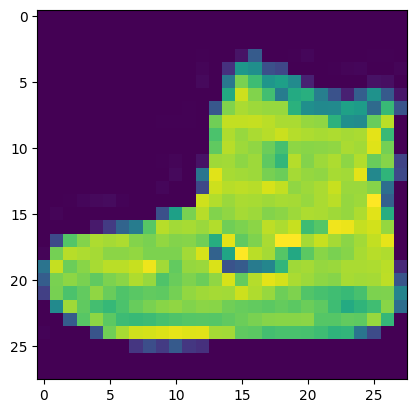

In [106]:
plt.imshow(train_images[0])

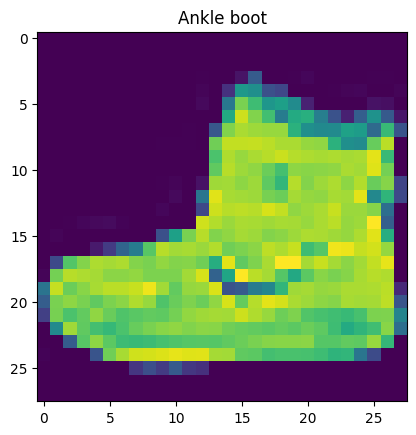

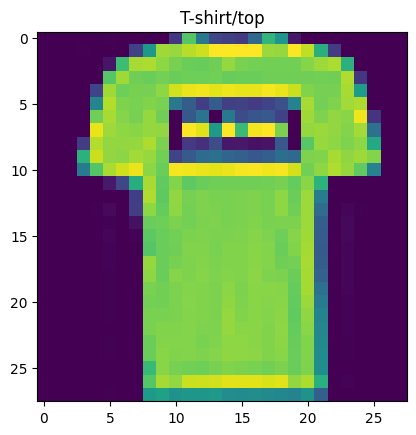

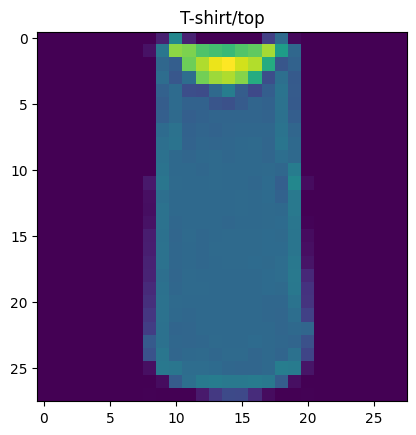

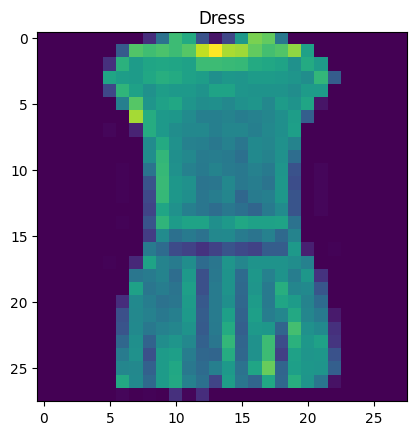

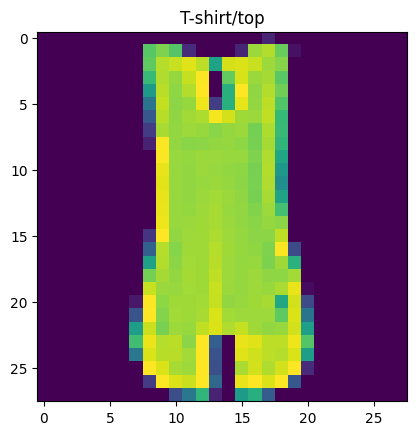

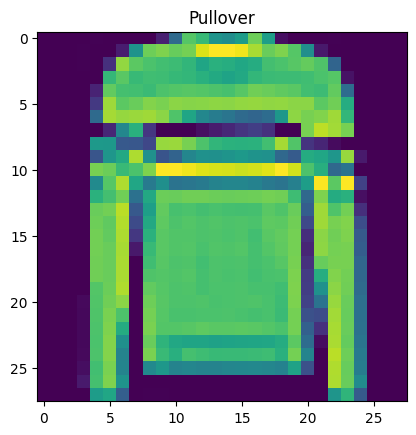

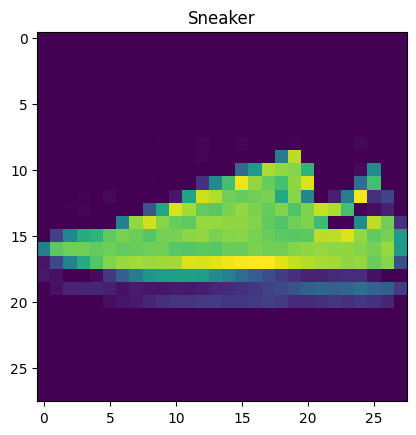

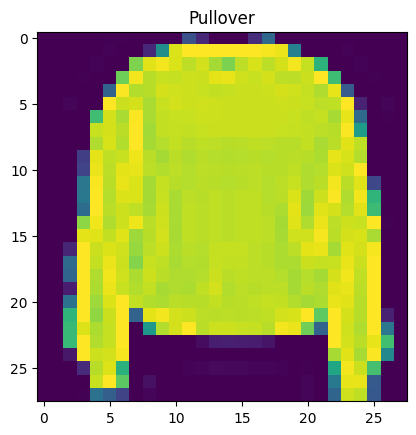

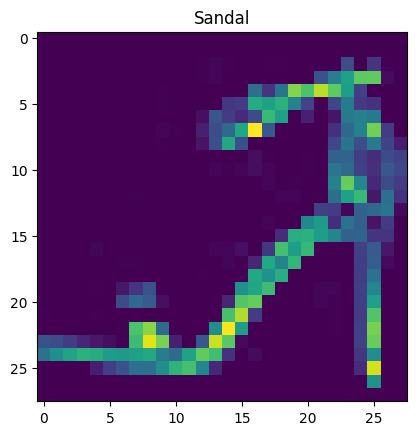

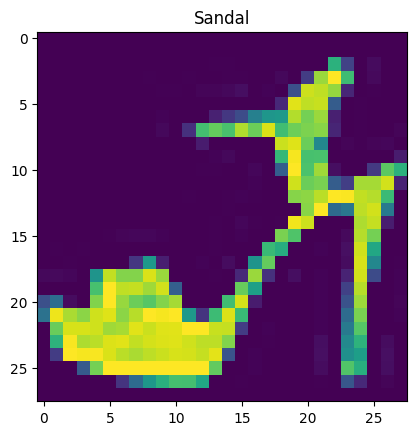

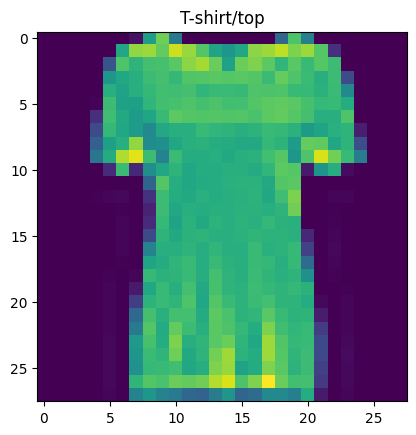

In [107]:
for i,img in enumerate(train_images):
    plt.imshow(img)
    plt.title(class_names[train_labels[i]])
    plt.show()
    if i==10:
        break

In [108]:
train_images=train_images/255
test_images=test_images/255

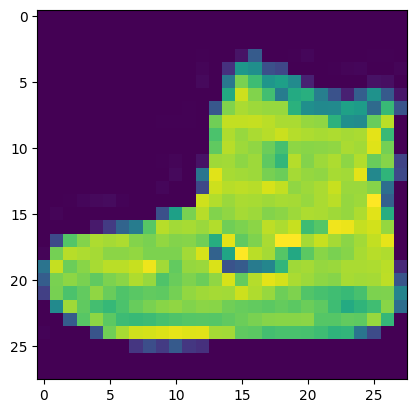

In [110]:
plt.figure()
# plt.colorbar()
plt.imshow(train_images[0])
plt.show()

In [111]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

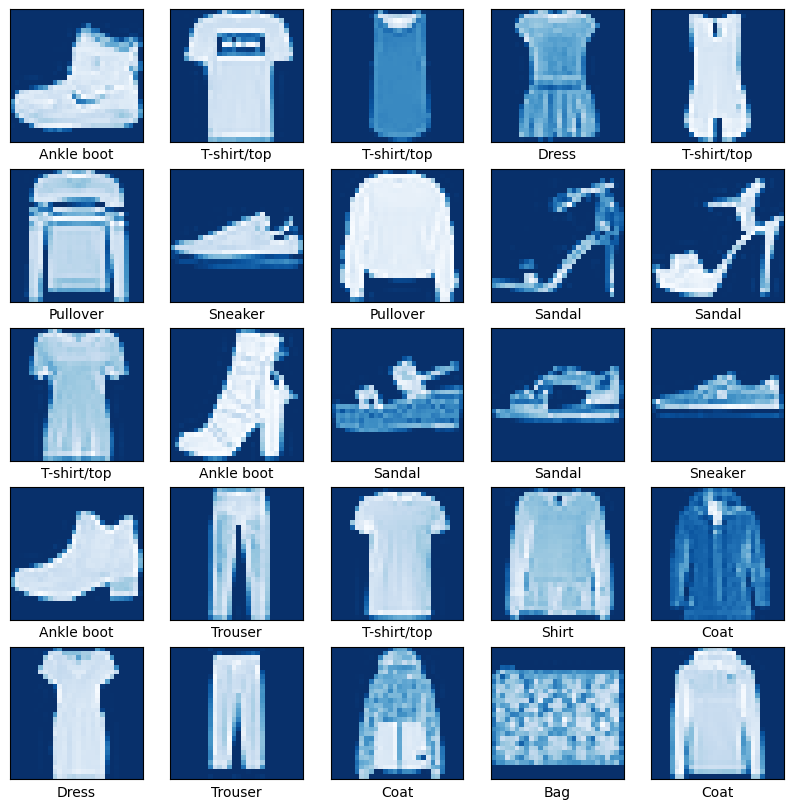

In [113]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.Blues_r)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## চলো আবার করি ভুলে গেছি তো কি করব :)


In [114]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [115]:
from pickletools import optimize


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [116]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7790 - loss: 0.6350
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8641 - loss: 0.3831
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8734 - loss: 0.3438
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8858 - loss: 0.3119
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8903 - loss: 0.2972
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8955 - loss: 0.2780
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8988 - loss: 0.2712
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9044 - loss: 0.2537
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9085 - loss: 0.2495
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9085 - loss: 0.2435


In [117]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8873 - loss: 0.3286
Test accuracy: 0.8833000063896179


In [ ]:
# from sklearn.metrics import accuracy_score
# pred_lebel = model.predict_classes(test_images)
# accuracy_score(test_labels, pred_lebel)

In [121]:
predictions=model.predict(test_images)
predictions.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(10000, 10)

In [122]:
predictions[0]

array([5.6852747e-07, 9.2221059e-10, 3.3308009e-10, 2.1502120e-09,
       4.1637853e-09, 2.6563052e-05, 3.4731286e-07, 1.2192162e-02,
       3.4784156e-07, 9.8777992e-01], dtype=float32)

In [123]:
np.max(predictions[0])

np.float32(0.9877799)

In [124]:
np.argmax(predictions[0])

np.int64(9)

In [128]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [129]:
model.fit(train_images, train_labels, epochs=200, callbacks=[callbacks])

Epoch 1/200
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9141 - loss: 0.2280
Reached 90% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9141 - loss: 0.2280


In [130]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

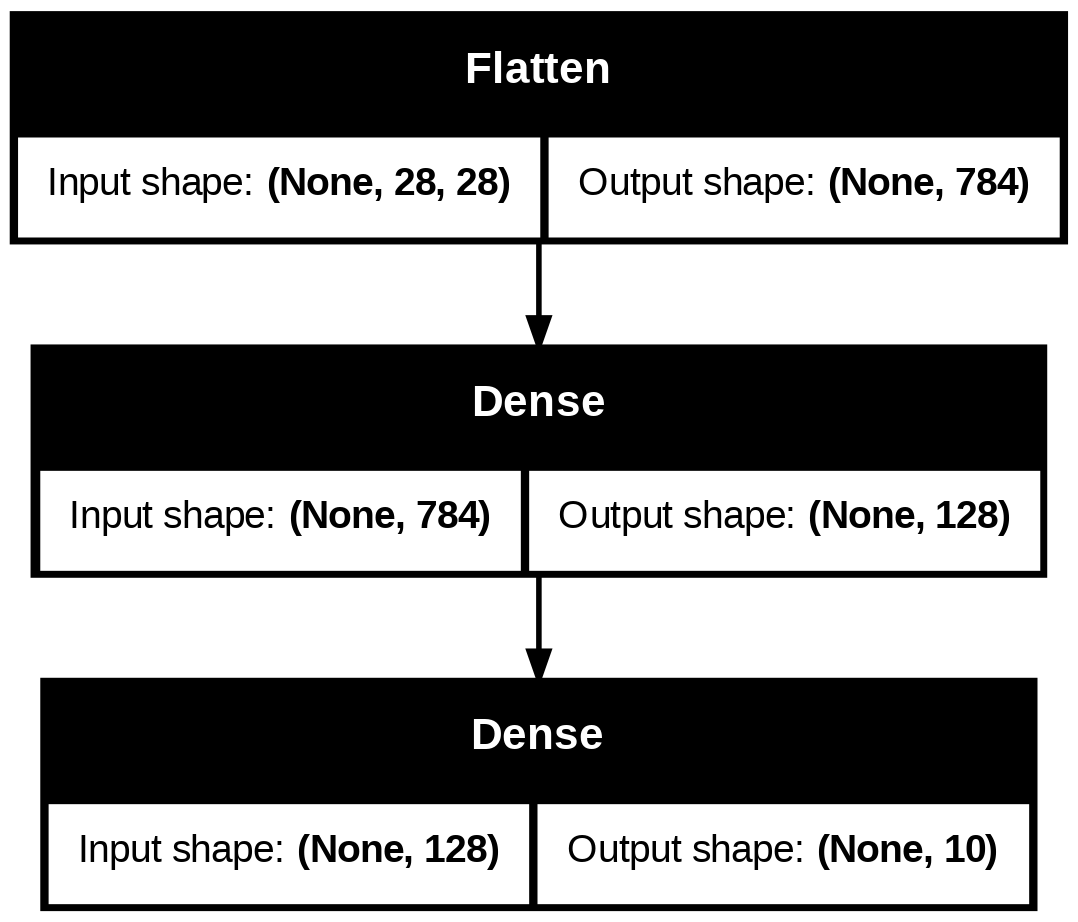

In [131]:
keras.utils.plot_model(model, show_shapes=True)

In [133]:
export_dir = './1'
tf.saved_model.save(model, export_dir)

TypeError: this __dict__ descriptor does not support '_DictWrapper' objects

In [137]:
model.save("./1.h5")

WARNING:absl:You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`.
This file format is considered legacy. We recommend using instead the native Keras format,
e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`.


In [138]:
model.save("mymodel.keras")

In [139]:
import os
print(os.listdir())

['.config', '1.h5', 'mymodel.keras', 'model.png', 'sample_data']


In [144]:
converter = tf.lite.TFLiteConverter.from_saved_model("./1.h5")
tflite_model = converter.convert()

OSError: SavedModel file does not exist at: ./1.h5/{saved_model.pbtxt|saved_model.pb}

In [ ]:
with open('model.tflite', "wb") as f:
  f.write(tflite_model)